## Decision Trees with Python

The Python code in this Notebook is provided as part of a [Dave on Data](https://www.daveondata.com) on-demand webinar on decision trees with Python.

This code is provided **as-is** for your use. No warranty for this code should be assumed or is implied.

### Load the *Adult Census* Dataset

In [1]:
import pandas as pd

adult_train = pd.read_csv('adult_train.csv')
adult_train.head()

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Label
0,20,Private,30035,Assoc-acdm,12,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
1,22,Private,141297,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K
2,63,Private,440607,Preschool,1,Married-civ-spouse,Prof-specialty,Husband,Other,Male,0,0,30,Mexico,<=50K
3,32,Private,165949,Bachelors,13,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,1590,42,United-States,<=50K
4,36,Private,139743,Some-college,10,Widowed,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K


### Get *Race* Value Counts

In [3]:
# Get the counts of categorical levels
adult_train['Race'].value_counts(dropna = False)

Race
White                 13126
Black                  1219
Asian-Pac-Islander      462
Amer-Indian-Eskimo      116
Other                    93
Name: count, dtype: int64

### One-Hot Encoding
#### The DecisionTreeClassifier only works with numeric data.
#### The easiest way to transform categorical features is using one-hot encoding.

In [5]:
# Use the get_dummies() function to one-hot encode
race_encoding = pd.get_dummies(adult_train['Race'])
race_encoding.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,False,True


### One-Hot Encoding with Prefix

In [6]:
# Use the get_dummies() function to one-hot encode with a prefix
race_encoding = pd.get_dummies(adult_train['Race'], prefix = 'Race')
race_encoding.head()

,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,False,True


### One-Hot Encode Multiple Features

In [7]:
# Create a ist of feature to one-hot encode
cat_features = ['Race', 'Sex']

# One-hot encode multiple features
encoded_train = pd.get_dummies(adult_train, prefix = cat_features, columns = cat_features)
encoded_train.head()

,Age,WorkClass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Label,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,20,Private,30035,Assoc-acdm,12,Never-married,Sales,Own-child,0,0,40,United-States,<=50K,False,False,False,False,True,True,False
1,22,Private,141297,Some-college,10,Never-married,Tech-support,Own-child,0,0,40,United-States,<=50K,False,False,False,False,True,False,True
2,63,Private,440607,Preschool,1,Married-civ-spouse,Prof-specialty,Husband,0,0,30,Mexico,<=50K,False,False,False,True,False,False,True
3,32,Private,165949,Bachelors,13,Divorced,Machine-op-inspct,Not-in-family,0,1590,42,United-States,<=50K,False,False,False,False,True,True,False
4,36,Private,139743,Some-college,10,Widowed,Prof-specialty,Own-child,0,0,40,United-States,<=50K,False,False,False,False,True,True,False


### Prepare the Features
#### The first step in performing machine learning with any technology is preparing the data.
#### When using scikit-learn, the convention is to create a DataFrame of the predictive features:

In [8]:
# Prepare data for machine learning
all_features = ['Age', 'EducationNum', 'MaritalStatus', 'HoursPerWeek']

# Select the above features and one-hot encode MaritalStatus
adult_X = pd.get_dummies(adult_train[all_features], 
                         prefix = 'MaritalStatus', 
                         columns = ['MaritalStatus'])
adult_X.head()

,Age,EducationNum,HoursPerWeek,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,MaritalStatus_Separated,MaritalStatus_Widowed
0,20,12,40,False,False,False,False,True,False,False
1,22,10,40,False,False,False,False,True,False,False
2,63,1,30,False,False,True,False,False,False,False
3,32,13,42,True,False,False,False,False,False,False
4,36,10,40,False,False,False,False,False,False,True


### Prepare the Labels

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
adult_y = label_encoder.fit_transform(adult_train['Label'])

print(label_encoder.classes_)
print(adult_y)


['<=50K' '>50K']
[0 0 0 ... 1 1 1]


### Training a Model

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Train a CART-like classification tree
tree_1 = DecisionTreeClassifier(min_samples_leaf = 3000, random_state = 12345)

tree_1.fit(adult_X, adult_y)

DecisionTreeClassifier(min_samples_leaf=3000, random_state=12345)

### Visualizing the Model

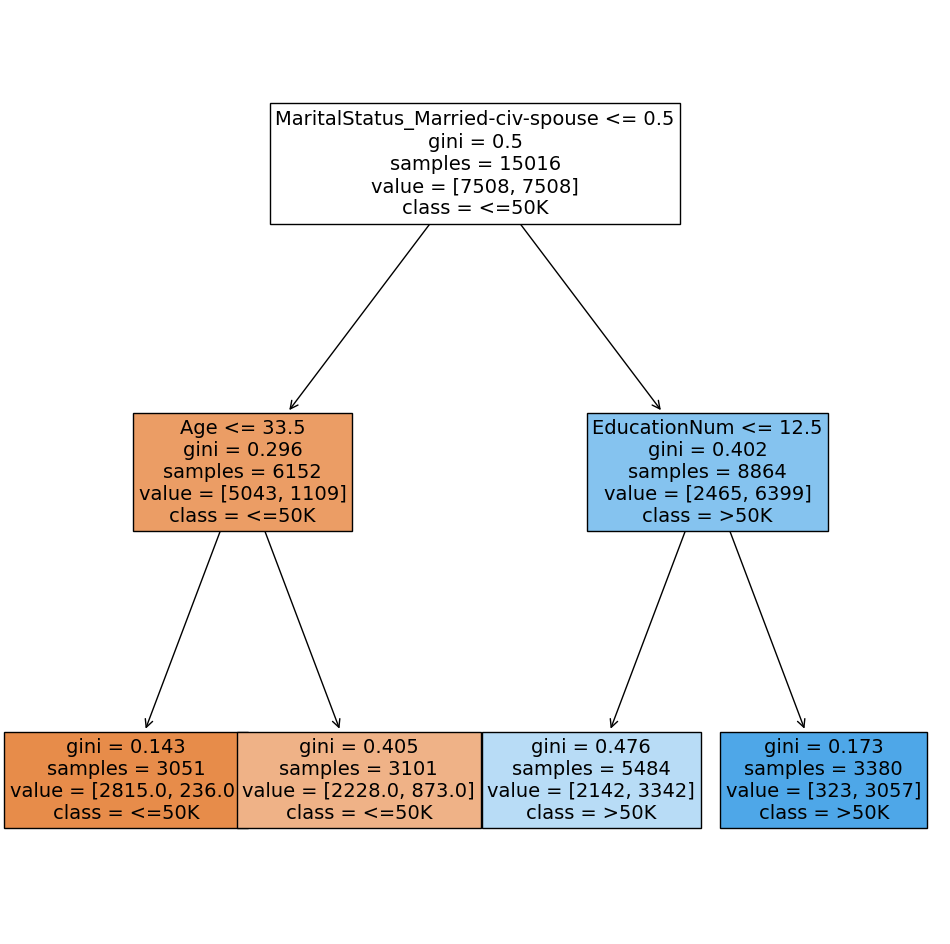

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the size of the tree visual to be 12 by 12 inches
plt.figure(figsize=(12,12))

# Create a visual representions of the tree
plot_1 = plot_tree(tree_1, feature_names = list(adult_X.columns), fontsize = 14,
                   class_names = list(label_encoder.classes_), filled = True)

### Load the Testing Dataset

In [14]:
# Load the Adult Census test dataset
adult_test = pd.read_csv('adult_test.csv')

### Preparing the Test Features

In [15]:
# Use the same training features and one-hot encode
adult_test_X = pd.get_dummies(adult_test[all_features], 
                              prefix = 'MaritalStatus', 
                              columns = ['MaritalStatus'])
adult_test_X.head()

,Age,EducationNum,HoursPerWeek,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,MaritalStatus_Separated,MaritalStatus_Widowed
0,32,13,40,False,False,False,False,True,False,False
1,34,10,32,False,False,True,False,False,False,False
2,20,10,40,False,False,False,False,True,False,False
3,36,4,35,False,False,True,False,False,False,False
4,73,9,35,True,False,False,False,False,False,False


### Making Predictions

In [16]:
# Encode the labels of the test dataset
adult_test_y = label_encoder.transform(adult_test['Label'])

# Make predictions on the test dataset
test_preds = tree_1.predict(adult_test_X)

print(test_preds)

[0 1 0 ... 1 1 0]


### How Well Did the Model Learn?

Test dataset accuracy: 0.7607


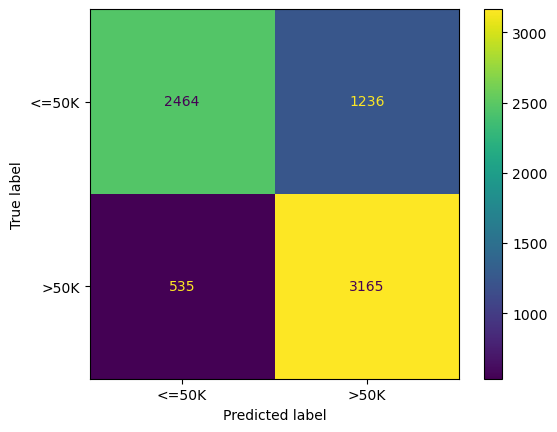

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# What is the overall accuracy on the test dataset?
print(f'Test dataset accuracy: {tree_1.score(adult_test_X, adult_test_y):.4f}')

# Display a confusion matrix
cm = confusion_matrix(adult_test_y, test_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels = label_encoder.classes_)
cmd.plot();